<a href="https://colab.research.google.com/github/ernanibn/reconhecimento_padroes_23/blob/main/aula3a_multiclasse_Exerc%C3%ADcio_Resolvido_Ernani_Brand%C3%A3o_Nascimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [4]:
set(y)

{0, 1, 2}

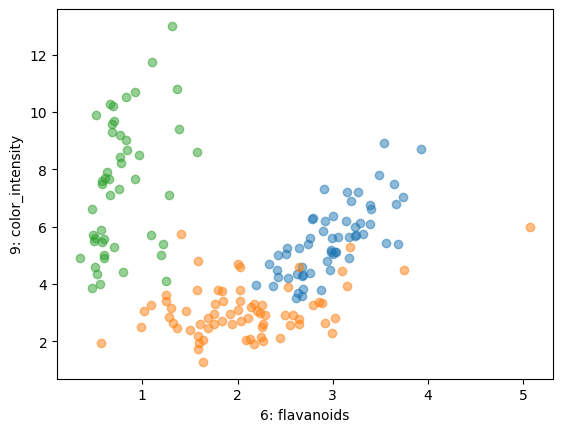

In [5]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [6]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [7]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [8]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([7.60555267e-05, 5.74588776e-05, 5.00679016e-05, 4.81605530e-05,
        6.17504120e-05]),
 'score_time': array([0.00131989, 0.00121021, 0.0011518 , 0.00109839, 0.00110364]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[20,  2,  2],
       [ 0, 22,  2],
       [ 0,  2,  4]])

In [10]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.7868398268398269

In [11]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [12]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([8.44001770e-05, 8.05854797e-05, 5.10215759e-05, 5.03063202e-05,
        5.00679016e-05]),
 'score_time': array([0.00527096, 0.0022018 , 0.00204039, 0.00193739, 0.00391793]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [13]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([6.93798065e-05, 7.89165497e-05, 8.34465027e-05, 5.22136688e-05,
        4.98294830e-05]),
 'score_time': array([0.0052073 , 0.0062716 , 0.00400066, 0.00307965, 0.00298595]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([7.84397125e-05, 5.05447388e-05, 5.00679016e-05, 4.95910645e-05,
        5.03063202e-05, 6.60419464e-05, 4.93526459e-05, 4.95910645e-05,
        4.95910645e-05, 5.10215759e-05, 5.00679016e-05, 4.86373901e-05,
        4.91142273e-05, 4.93526459e-05, 4.95910645e-05, 6.50882721e-05,
        4.86373901e-05, 5.03063202e-05, 4.88758087e-05, 5.74588776e-05,
        6.29425049e-05, 4.98294830e-05, 4.98294830e-05, 4.91142273e-05,
        4.95910645e-05, 7.67707825e-05, 6.86645508e-05, 7.41481781e-05,
        5.10215759e-05, 5.05447388e-05, 4.95910645e-05, 5.03063202e-05,
        5.10215759e-05, 5.14984131e-05, 5.10215759e-05, 4.95910645e-05,
        5.03063202e-05, 5.00679016e-05, 4.95910645e-05, 5.03063202e-05,
        5.05447388e-05, 5.03063202e-05, 4.98294830e-05, 5.05447388e-05,
        5.17368317e-05, 4.95910645e-05, 4.93526459e-05, 5.03063202e-05,
        4.95910645e-05, 8.63075256e-05]),
 'score_time': array([0.00752234, 0.00446677, 0.00438213, 0.00439239, 0.00434995,


In [15]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [16]:
modelo.intercept_

array([-105.,  114.,   19.])

In [17]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

In [18]:
# Função para definição do hyperplano
def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


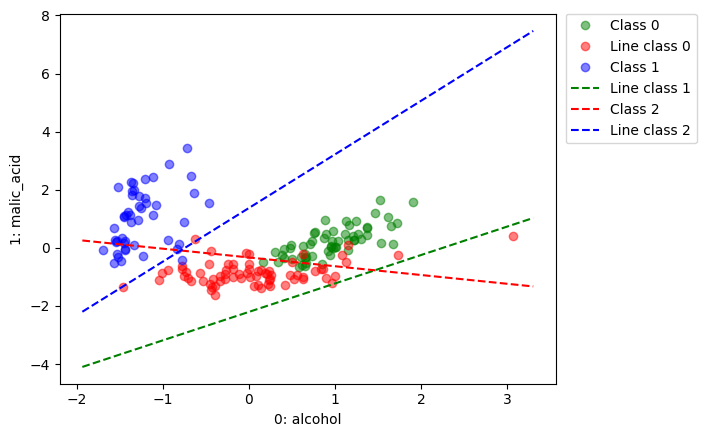

In [30]:
# Modelo fit com apenas as duas features escolhidas(6, 9) para a classificação
i, j = 6, 9
Xdec = X[:,[i,j]]

# Padronização dos valores
mean = Xdec.mean(axis=0)
std = Xdec.std(axis=0)
Xdec = (Xdec - mean) / std

# definição do Modelo
modelo = Perceptron()
modelo.fit(Xdec, y)

plt.xlabel(f"{0}: {dataset.feature_names[0]}")
plt.ylabel(f"{1}: {dataset.feature_names[1]}")

set_color = ['g', 'r', 'b']

for k in set(y):
  plt.plot(Xdec[:,0][y==k], Xdec[:,1][y==k], "o", alpha=0.5, color=set_color[k])

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

coef = modelo.coef_
intercept = modelo.intercept_

for l, color in zip(modelo.classes_, set_color):
    plot_hyperplane(l, color)

plt.legend(['Class 0', 'Line class 0', 'Class 1', 'Line class 1', 'Class 2', 'Line class 2']
           , loc=(1.02, 0.65))
plt.show()


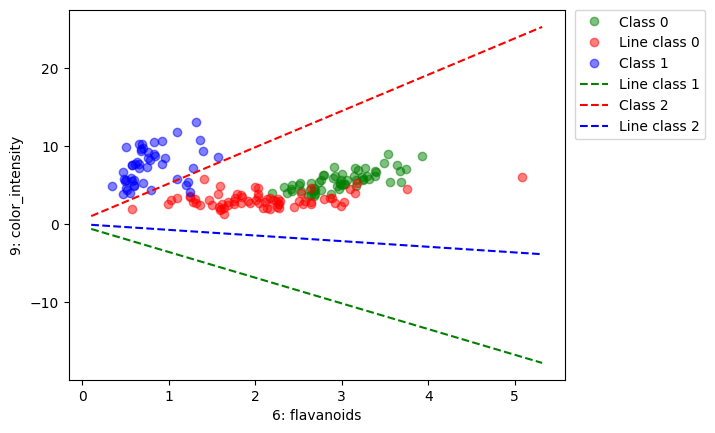

In [28]:



Xdec = X[:]

# definição do Modelo
modelo = Perceptron()
modelo.fit(Xdec, y)

i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

set_color = ['g', 'r', 'b']

for k in set(y):
  plt.plot(Xdec[:,i][y==k], Xdec[:,j][y==k], "o", alpha=0.5, color=set_color[k])

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

coef = modelo.coef_
intercept = modelo.intercept_

for i, color in zip(modelo.classes_, set_color):
    plot_hyperplane(i, color)

plt.legend(['Class 0', 'Line class 0', 'Class 1', 'Line class 1', 'Class 2', 'Line class 2']
           , loc=(1.02, 0.65))
plt.show()
